# Predicting heart disease using machine learning
This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease nased on their medical attributes.

We're going to take the following approach:

Problem definetion
Data
Evaluation
Features
Modelling
Experimentation


## 1. Problem Definetion
In a statement Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The orignal data came from the Cleavland data from the UCI Machine learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4. Features
This is where you get different information about each of the features is your data.

## Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
      * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
      * 0: Nothing to note
      * 1: ST-T Wave abnormality
            - can range from mild symptoms to severe problems
            - signals non-normal heart beat
      * 2: Possible or definite left ventricular hypertrophy
            - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
      * looks at stress of heart during excercise
      * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
      * 0: Upsloping: better heart rate with excercise (uncommon)
      * 1: Flatsloping: minimal change (typical healthy heart)
      * 2: Downslopins: signs of unhealth heart
12. ca - number of major vessels (0-3) colored by flourosopy
      * colored vessel means the doctor can see the blood passing through
      * the more blood movement the better (no clots)
13. thal - thalium stress result
      * 1,3: normal
      * 6: fixed defect: used to be defect but ok now
      * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [3]:
# Import all the tools we used

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [10]:
## Load data
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

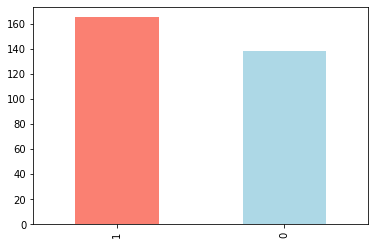

In [14]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [16]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


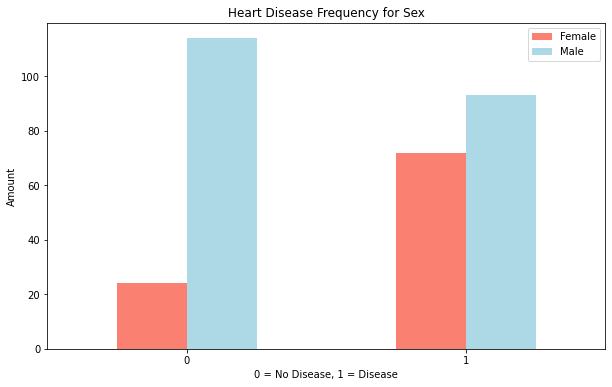

In [20]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [21]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart rate for heart Disease

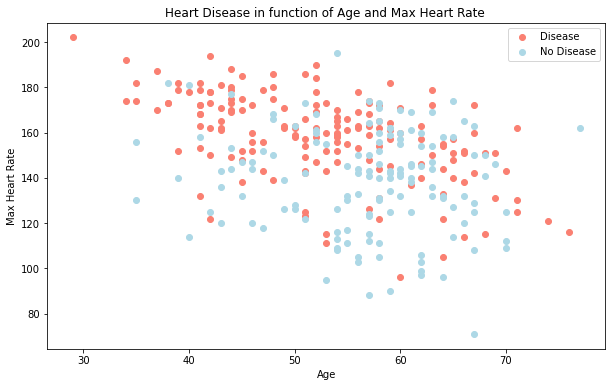

In [22]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate ")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

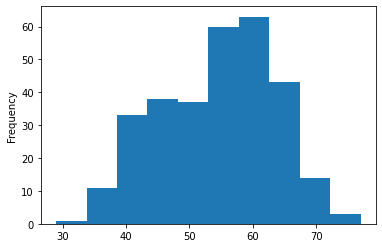

In [23]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frquency per chest Pain Type
3. cp - chest pain type
       * 0: Typical angina: chest pain related decrease blood supply to the heart
       * 1: Atypical angina: chest pain not related to heart
       * 2: Non-anginal pain: typically esophageal spasms (non heart related)
       * 3: Asymptomatic: chest pain not showing signs of disease

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


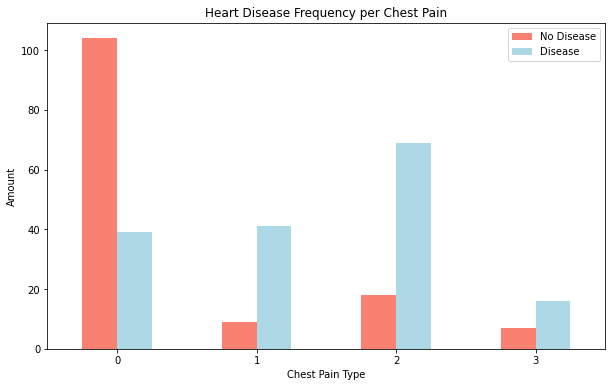

In [25]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=[10, 6],
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [26]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


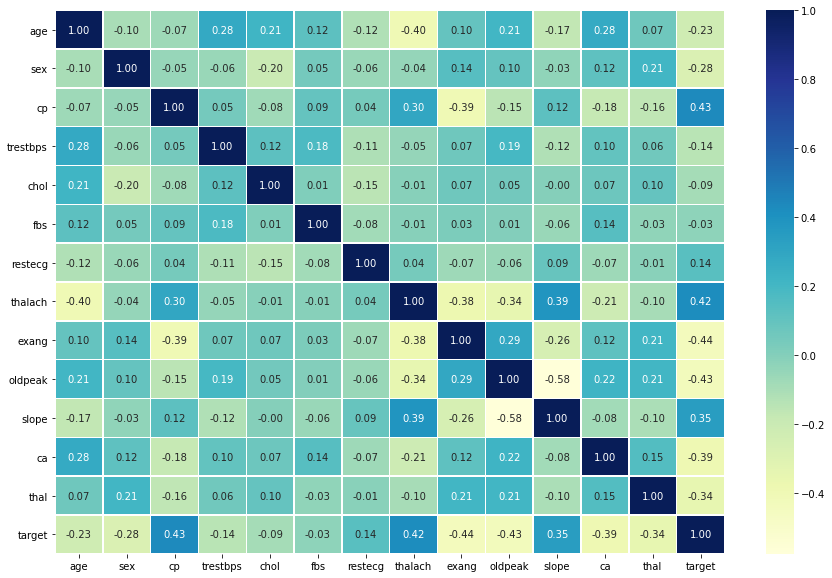

In [27]:
# Let's make our correlation marix a little prettier
corr_matrix =df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

##  Modelling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [30]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2) 

In [31]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [32]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64, 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

 We'll train it(find the patterns) on the training set.

 And we'll test it (use the patterns) on the test set.
 
 We're going to try 3 different machine learning models:
 
  1. Logistic Regression
  2. K-Nearest Neighbours Classifier
  3. Random Forest Classifier
  4. CatBoost Classifier
  5. SVM
  6. XGBOOST

In [33]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGB": XGBClassifier(),
         
          }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dictionary of different Scikit-learn machine learning models.
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
                             
model_scores                            

C:\Users\ruhim\Desktop\ml\practice_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'XGB': 0.8524590163934426}

## CatboostClassifier

In [35]:
params = {
          'loss_function': 'Logloss',  #objective functon
          'eval_metric': 'AUC',        #metric
          'verbose': 200,              #output to stdout info about training process every 200 iterations
          'random_seed': 42}

cbc = CatBoostClassifier(**params)
cbc.fit(x_train, y_train, # data to train on
        eval_set=(x_test, y_test), # data to validate on
        use_best_model=True, #True if we don't wnat to seetrees created after iteration
       );

Learning rate set to 0.022321
0:	test: 0.8954741	best: 0.8954741 (0)	total: 248ms	remaining: 4m 7s
200:	test: 0.9224138	best: 0.9267241 (65)	total: 445ms	remaining: 1.77s
400:	test: 0.9202586	best: 0.9267241 (65)	total: 659ms	remaining: 985ms
600:	test: 0.9159483	best: 0.9267241 (65)	total: 867ms	remaining: 576ms
800:	test: 0.9116379	best: 0.9267241 (65)	total: 1.08s	remaining: 268ms
999:	test: 0.9073276	best: 0.9267241 (65)	total: 1.28s	remaining: 0us

bestTest = 0.9267241379
bestIteration = 65

Shrink model to first 66 iterations.


In [36]:
cbc.get_feature_importance()

array([ 5.37387805,  7.08232546, 14.27445685,  3.46498547,  3.31001126,
        0.73490481,  5.40177301,  3.24543139,  5.90567652,  6.95657974,
        8.77973329, 21.71834824, 13.75189592])

In [37]:
print(cbc.get_best_score())

{'learn': {'Logloss': 0.013409046637373873}, 'validation': {'Logloss': 0.34379521885133796, 'AUC': 0.9267241379310345}}


In [38]:
print(cbc.learning_rate_)

0.022321000695228577


## SVM

In [39]:
from sklearn import svm

svr_reg = svm.SVC(kernel='linear', C=10, gamma='auto')
svr_reg.fit(x_train, y_train)
svr_reg.score(x_test, y_test)

0.8852459016393442

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1, 10, 20],
        'kernel': ['linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=3
)

rs.fit(x_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.813861
1,10,linear,0.809694
2,20,linear,0.809779


In [42]:
model_params = {
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C':[1, 5, 10]
        }
    }
}

In [43]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [44]:
hp = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
hp

,model,best_score,best_params
0,random_forest,0.785204,{'n_estimators': 10}
1,logistic_regression,0.826361,{'C': 1}


In [93]:
clf.score(x_test, y_test)

0.8688524590163934

The best test score we got in Catboost classifier 
bestTest = 0.9267241379
bestIteration = 65